In [1]:
#importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#definimos la ruta del archivo y cargamos el dataframe
file_path = r"C:\Users\Juan Diego\Downloads\propiedades_filtradas.csv"
df = pd.read_csv(file_path)

In [3]:
#eliminamos la columna id si esta presente en el dataframe
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

In [4]:
#filtramos las propiedades con precio menor o igual a 5000
df = df[df["precio"] <= 5000]

In [5]:
#definimos las variables predictoras y la variable objetivo
predictor_vars = ["camaras", "habitaciones", "banos", "tamano", "parqueos"]
target_var = "precio"

In [6]:
#inicializamos un diccionario para almacenar los r2 univariados
univariate_r2 = {}
y = df[target_var]

In [7]:
#calculamos el r2 univariado para cada predictor
for predictor in predictor_vars:
    X_single = df[[predictor]]
    model = LinearRegression()
    model.fit(X_single, y)
    y_pred = model.predict(X_single)
    r2 = r2_score(y, y_pred)
    univariate_r2[predictor] = r2

In [8]:
#imprimimos los r2 univariados para cada predictor
print("R² univariado para cada predictor:")
for predictor, r2_value in univariate_r2.items():
    print(f"  {predictor}: {r2_value:.4f}")

R² univariado para cada predictor:
  camaras: 0.0092
  habitaciones: 0.1577
  banos: 0.3961
  tamano: 0.5604
  parqueos: 0.2521


In [9]:
#identificamos la variable con menor r2 univariado
min_predictor = min(univariate_r2, key=univariate_r2.get)
print(f"\nVariable con menor R² univariado: {min_predictor}")


Variable con menor R² univariado: camaras


In [10]:
#ordenamos las variables por r2 y obtenemos las dos con menor r2
sorted_predictors = sorted(univariate_r2.items(), key=lambda x: x[1])
lowest_two = [item[0] for item in sorted_predictors[:2]]
print(f"Las dos variables con menor R² univariado: {lowest_two}")

Las dos variables con menor R² univariado: ['camaras', 'habitaciones']


In [11]:
#definimos una funcion para realizar el analisis de regresion multiple
def multiple_regression_analysis(df, predictors, target_var, analysis_name="analisis"):
    #mostramos el nombre del analisis y las variables utilizadas
    print("\n" + "="*60)
    print(f"{analysis_name}")
    print(f"variables utilizadas: {predictors}")
    
    #preparamos las variables predictoras y la variable objetivo
    X = df[predictors]
    y = df[target_var]
    
    #dividimos el dataframe en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #creamos y entrenamos el modelo de regresion lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    #realizamos predicciones y calculamos las metricas r2 y mse
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"R² del modelo: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    
    #mostramos los coeficientes del modelo ordenados
    coef_df = pd.DataFrame({"Variable": X.columns, "Coeficiente": model.coef_}).sort_values(by="Coeficiente", ascending=False)
    print("Coeficientes del modelo:")
    print(coef_df)
    
    #graficamos los valores reales contra los valores predichos
    plt.figure(figsize=(8,5))
    plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
    plt.xlabel('Valores Reales (Precio)')
    plt.ylabel('Valores Predichos (Precio)')
    plt.title(f'Valores Reales vs. Valores Predichos - {analysis_name}')
    plt.show()
    
    #graficamos los coeficientes del modelo
    plt.figure(figsize=(8,5))
    plt.barh(coef_df["Variable"], coef_df["Coeficiente"], color="green")
    plt.xlabel("Valor del Coeficiente")
    plt.ylabel("Variable")
    plt.title(f'Coeficientes de las Variables - {analysis_name}')
    plt.gca().invert_yaxis()
    plt.show()
    
    #analizamos los residuos entre los valores predichos y los reales
    plt.figure(figsize=(8,5))
    sns.residplot(x=y_pred, y=y_test, lowess=True, line_kws={'color': 'red'})
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Valores Predichos (Precio)')
    plt.ylabel('Residuos (Valores Reales - Predichos)')
    plt.title(f'Analisis de Residuos - {analysis_name}')
    plt.show()
    
    return model


primer analisis (todas las variables)
variables utilizadas: ['camaras', 'habitaciones', 'banos', 'tamano', 'parqueos']
R² del modelo: 0.5893
MSE: 334236.6879
Coeficientes del modelo:
       Variable  Coeficiente
2         banos   181.750069
4      parqueos    72.170953
1  habitaciones    28.902061
3        tamano     6.615840
0       camaras    -0.813520


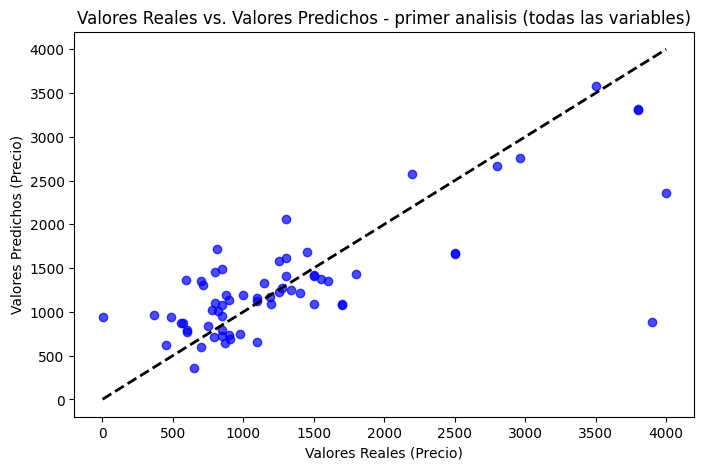

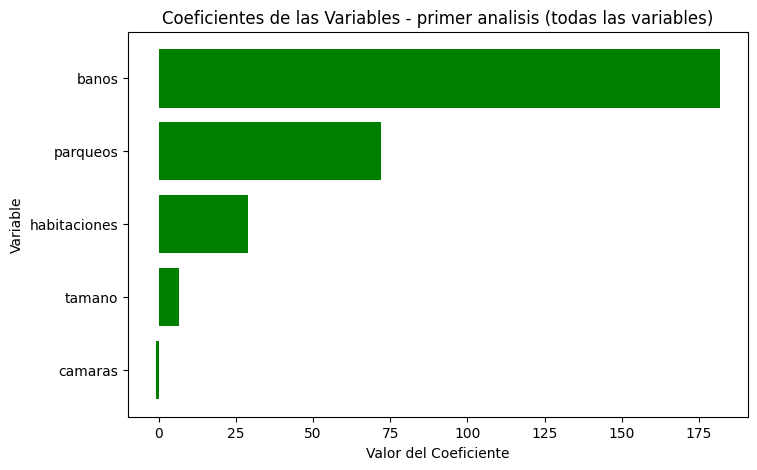

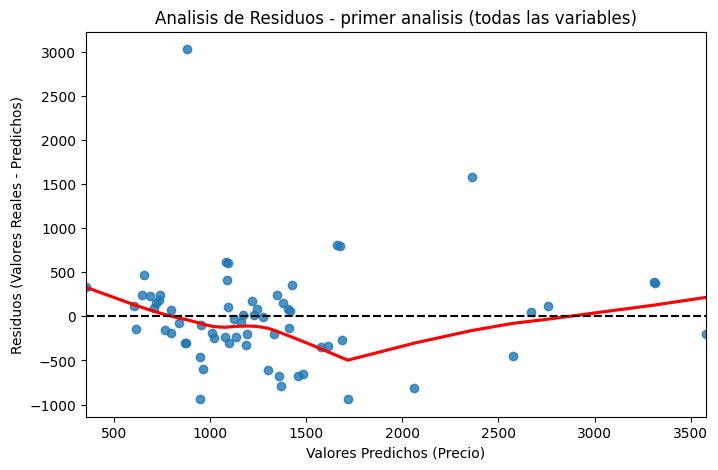

In [12]:
#realizamos el analisis con todas las variables predictoras
model_all = multiple_regression_analysis(df, predictor_vars, target_var, analysis_name="primer analisis (todas las variables)")


segundo analisis (omitiendo variable con menor r2)
variables utilizadas: ['habitaciones', 'banos', 'tamano', 'parqueos']
R² del modelo: 0.5911
MSE: 332811.7220
Coeficientes del modelo:
       Variable  Coeficiente
1         banos   181.382004
3      parqueos    70.497239
0  habitaciones    28.429955
2        tamano     6.611439


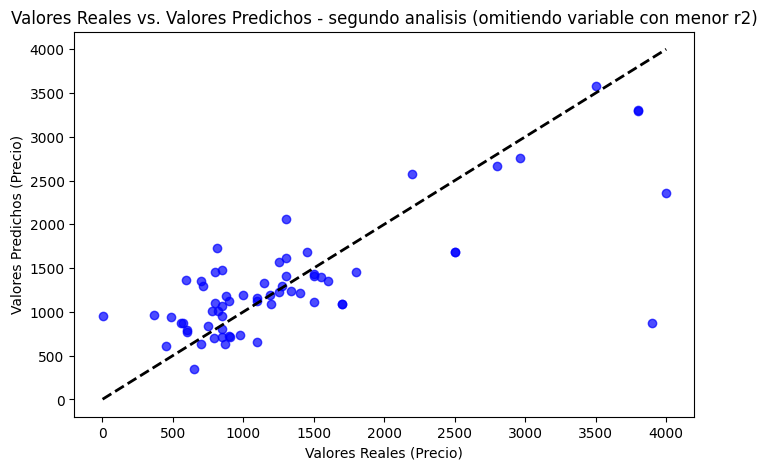

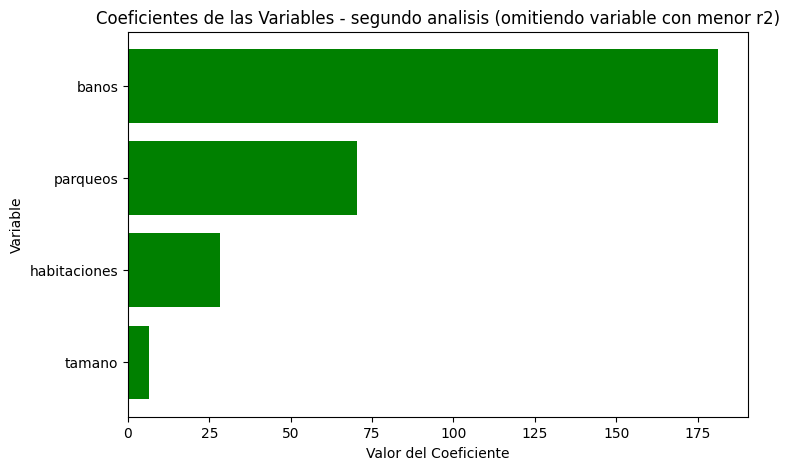

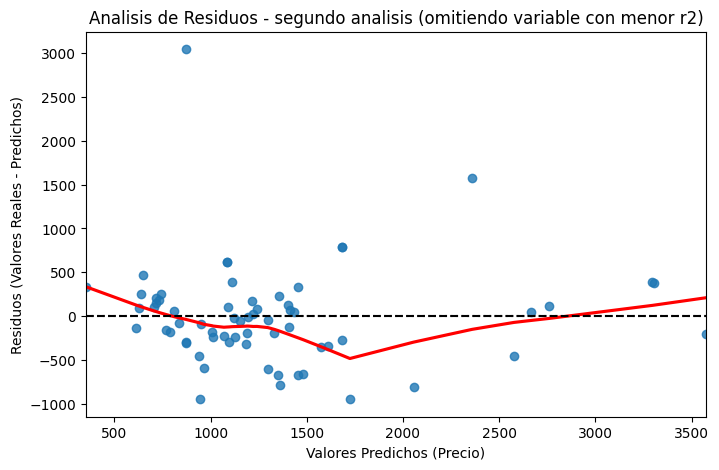

In [13]:
#realizamos el analisis omitiendo la variable con menor r2 univariado
predictors_second = [p for p in predictor_vars if p != min_predictor]
model_second = multiple_regression_analysis(df, predictors_second, target_var, analysis_name="segundo analisis (omitiendo variable con menor r2)")


tercer analisis (omitiendo las 2 variables con menor r2)
variables utilizadas: ['banos', 'tamano', 'parqueos']
R² del modelo: 0.5918
MSE: 332254.6388
Coeficientes del modelo:
   Variable  Coeficiente
0     banos   195.728721
2  parqueos    78.945826
1    tamano     6.587503


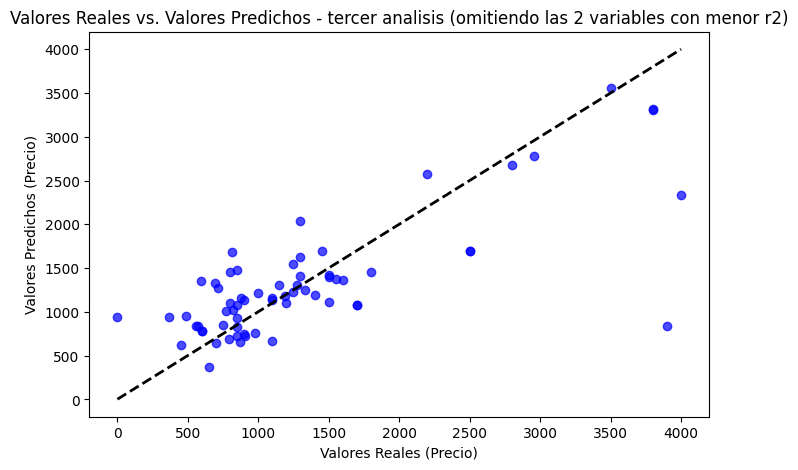

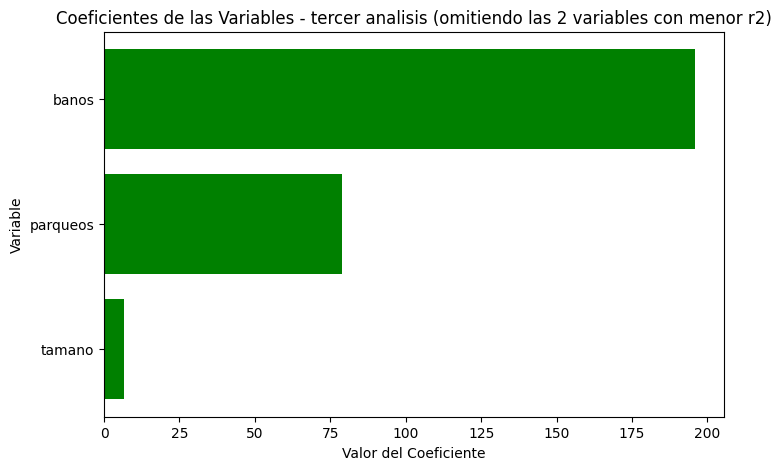

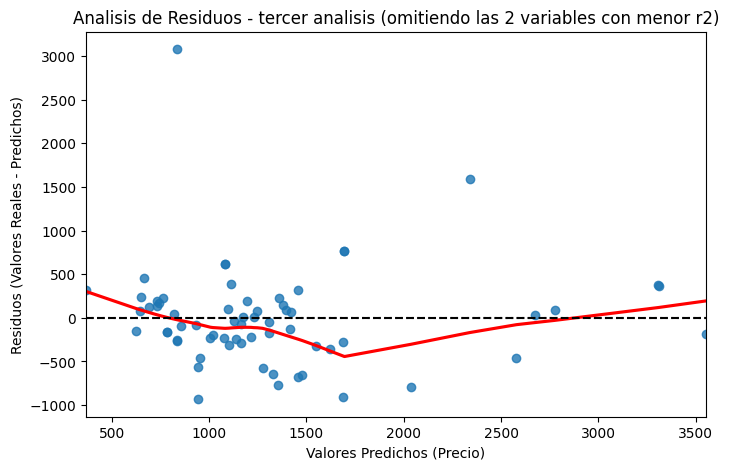

In [14]:
#realizamos el analisis omitiendo las dos variables con menor r2 univariado
predictors_third = [p for p in predictor_vars if p not in lowest_two]
model_third = multiple_regression_analysis(df, predictors_third, target_var, analysis_name="tercer analisis (omitiendo las 2 variables con menor r2)")